# Time Series Analysis: ANALYZE AND PREDICT MY DAILY STEPS 
- This is my real daily steps i extracted from "Health" in my icloud to practice time series analysis. In this notebook, we are going to try 3 different methods (Moving Average, AutoRegression, ARIMA) and see which model performs and predicts the best. 
- The data collected from 1 Sept til the current time when i do analysis (which is 28 Sept). Therefore, the prediction will be 29th 30th 31st.


In [1]:
import pandas as pd

# Data extracted from your screenshots
data = {
    "Date": [
        "28 Sep 2025","27 Sep 2025","26 Sep 2025","25 Sep 2025","24 Sep 2025",
        "23 Sep 2025","22 Sep 2025","21 Sep 2025","20 Sep 2025","19 Sep 2025",
        "18 Sep 2025","17 Sep 2025","16 Sep 2025","15 Sep 2025","14 Sep 2025",
        "13 Sep 2025","12 Sep 2025","11 Sep 2025","10 Sep 2025","9 Sep 2025",
        "8 Sep 2025","7 Sep 2025","6 Sep 2025","5 Sep 2025","4 Sep 2025",
        "3 Sep 2025","2 Sep 2025","1 Sep 2025"
    ],
    "Steps": [
        183,2020,2074,2941,1041,
        3167,580,318,2801,4103,
        3148,154,9158,5508,3250,
        1697,3818,5497,243,5157,
        724,190,1612,5158,641,
        610,5092,1039
    ]
}

# Create DataFrame
daily_steps = pd.DataFrame(data)

# Ensure date column is datetime type
daily_steps["Date"] = pd.to_datetime(daily_steps["Date"], format="%d %b %Y")

# Sort by date ascending (oldest first)
daily_steps = daily_steps.sort_values("Date").reset_index(drop=True)

print(daily_steps.head())


        Date  Steps
0 2025-09-01   1039
1 2025-09-02   5092
2 2025-09-03    610
3 2025-09-04    641
4 2025-09-05   5158


In [4]:
# Model 1: MA (Moving Average) 
from statsmodels.tsa.arima.model import ARIMA

# Define MA(1) model
model = ARIMA(daily_steps["Steps"], order=(0,0,1))
fit = model.fit()

print(fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Steps   No. Observations:                   28
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -255.020
Date:                Mon, 29 Sep 2025   AIC                            516.040
Time:                        10:21:40   BIC                            520.036
Sample:                             0   HQIC                           517.262
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2568.7143    489.633      5.246      0.000    1609.052    3528.377
ma.L1         -0.1192      0.258     -0.462      0.644      -0.625       0.387
sigma2      4.939e+06   1.87e+06      2.642      0.0

***Conclude***: In the first model (MA), it is noticeable that on average, i walk 2568 steps daily (const). However, the model couldn't use past data to predict new day (ma.L1: -0.11 with p-value 0.644) and 95% CI also shows wide range, indicating that the data does not follow an expected pattern. The variance of residuals is also huge ( sigma2: 4.939e+06) since there are days i walk up to 9000 steps and there are days there are only a few hundreds. <br>
In terms of statistical tests,
- Ljung-Box captures the autocorrelation well, with p-value 0,99.
- Heteroskedasticity shows no big variance of residuals
- Jarque-Bera test shows the residuals are postively skewed (1,12) with heavy tails (kurtosis: 4.34) 

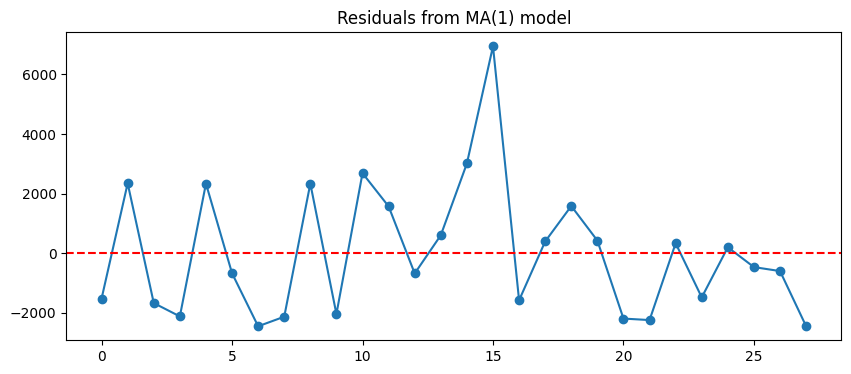

In [ ]:
# Visualize residuals in MA 
residuals = fit.resid
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(residuals, marker='o')
plt.axhline(0, linestyle='--', color='red')
plt.title("Residuals from MA(1) model")
plt.show()


**Note**: The sudden peak in the middle makes it hard for the model to predict (heavy tails)

In [9]:
# Forecast next 3 days
forecast = fit.get_forecast(steps=3)

# Mean predictions
print("Predicted steps:")
print(forecast.predicted_mean)

# 95% confidence interval
print("Confidence intervals:")
print(forecast.conf_int())


Predicted steps:
28    2861.695802
29    2568.714301
30    2568.714301
Name: predicted_mean, dtype: float64
Confidence intervals:
    lower Steps  upper Steps
28 -1493.912159  7217.303763
29 -1817.730047  6955.158649
30 -1817.730047  6955.158649


**Note**: Predicted steps shows values likely around the mean (2568 steps). However, 95% CI shows uncertaincy with wide range

In [ ]:
# Model 2: AR (AutoRegression)
from statsmodels.tsa.arima.model import ARIMA

# Fit AR(1) model
ar_model = ARIMA(daily_steps["Steps"], order=(1,0,0))
ar_fit = ar_model.fit()

print(ar_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Steps   No. Observations:                   28
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -255.043
Date:                Sun, 28 Sep 2025   AIC                            516.086
Time:                        19:12:11   BIC                            520.082
Sample:                             0   HQIC                           517.308
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2568.7143    492.719      5.213      0.000    1603.003    3534.426
ar.L1         -0.1021      0.244     -0.418      0.676      -0.581       0.377
sigma2      4.866e+06   1.76e+06      2.768      0.0

**Note**: Moving on to AR, in which the model is trained using real past data, although it fits slightly better (AIC: 516.086) compare to MA.

In [11]:
# Forecast next 3 days
ar_forecast = ar_fit.get_forecast(steps=3)

print("Predicted steps:")
print(ar_forecast.predicted_mean)

print("95% CI:")
print(ar_forecast.conf_int())


Predicted steps:
28    2812.271554
29    2543.849564
30    2571.252730
Name: predicted_mean, dtype: float64
95% CI:
    lower Steps  upper Steps
28 -1511.281190  7135.824297
29 -1802.175550  6889.874677
30 -1775.005987  6917.511446


In [ ]:
# Model 3: ARIMA (add differencing)
model = ARIMA(daily_steps["Steps"], order=(1,1,0))   # ARIMA(1,1,0)
fit = model.fit()
print(fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Steps   No. Observations:                   28
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -253.535
Date:                Sun, 28 Sep 2025   AIC                            511.070
Time:                        19:21:00   BIC                            513.661
Sample:                             0   HQIC                           511.840
                                 - 28                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4695      0.204     -2.306      0.021      -0.869      -0.071
sigma2      7.931e+06   2.39e+06      3.320      0.001    3.25e+06    1.26e+07
Ljung-Box (L1) (Q):                   1.78   Jarque-

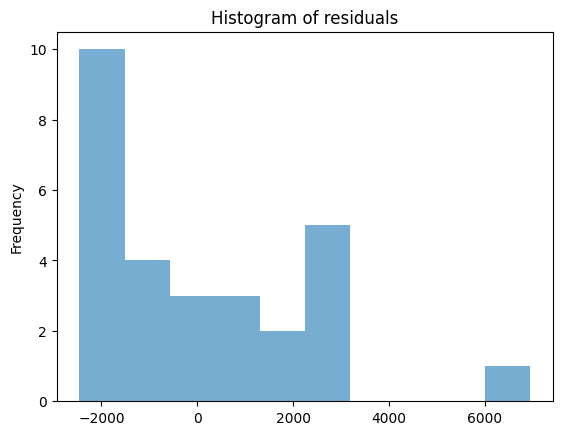

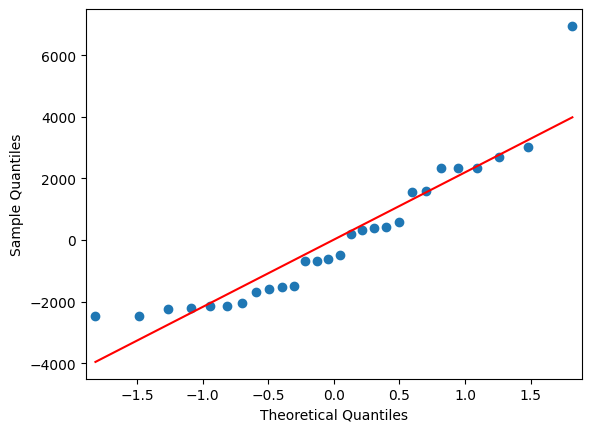

In [7]:
residuals = fit.resid

residuals.plot(kind="hist", bins=10, alpha=0.6)
plt.title("Histogram of residuals")
plt.show()

import statsmodels.api as sm
sm.qqplot(residuals, line="s")
plt.show()


**Note**: In ARIMA model, where the model learns the differences in steps instead of raw count, it captures the residuals (noise) better at ~ 7.9 million with p-value 0.001. Its coefficient suggests that if steps went up yesterday, it tends to go down today. <br>
- Ljung-Box shows residuals with no autocorrelation left (p-value 0.18)
- P-value 0,06 of heteroskedasticity shows weak evidence of residuals randomness
- However in Jarque-Bera, the differences are nearly symmetrical (skew: -0.09) and tails are nearly normal (Kurtosis: 2.78). In this test, p-value 0,95 shows the residuals are perfectly normal 

In [15]:
# Forecast next 3 days (Sep 29, 30, Oct 1)
forecast = fit.get_forecast(steps=3)

# Mean predictions
print("Predicted steps:")
print(forecast.predicted_mean)
forecast.predicted_mean.clip(lower=0)


# Confidence interval (95%)
print("95% CI:")
print(forecast.conf_int())


Predicted steps:
28    1045.539541
29     640.545279
30     830.705085
Name: predicted_mean, dtype: float64
95% CI:
    lower Steps  upper Steps
28 -4473.980908  6565.059989
29 -5607.471302  6888.561859
30 -6667.079027  8328.489198


**Note**: Predicted steps in ARIMA is way lower than the previous two models with clearer pattern as the next day could drop if the previous is high. Although 95% CI doesn't show certaincy, it improves better compare to the two models <br>
=> In terms of model fitting, expectedly ARIMA shows the best fit (AIC = 511.070)

In [8]:
!which python

/Users/linadabbi/Desktop/Python projects/SQL_projects/venv/bin/python
